In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# 1. 
Apply Hough transform (circular objects detection) and blob detection algorithm to detect coins present in image 'coins_1.jfif'. Comment on the outcomes of two methods.

In [ ]:
img = cv.imread('coins_1.jfif')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#hough
gray = cv.GaussianBlur(gray,(7,7),1)

rows = gray.shape[0]
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, rows/8, param1 = 50, param2 = 25, minRadius = 10, maxRadius =  30)

if circles is not None:
    circles = np.uint8(np.around(circles))
    for i in circles[0]:
        center = (i[0], i[1])
        # circle center
        cv.circle(img, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv.circle(img, center, radius, (255, 0, 0), 3)
        
cv.imshow("hough", img)

#blob
im = cv.imread('coins_1.jfif')
blur = cv.GaussianBlur(im, (3, 3), 0)
gray = cv.cvtColor(blur, cv.COLOR_BGR2GRAY)

# parameters
params = cv.SimpleBlobDetector_Params()
# Change thresholds
#params.minThreshold = 50
#params.maxThreshold = 255

#turn off filter
params.blobColor = 255
params.filterByCircularity=True
params.filterByArea = True
params.filterByConvexity = False
params.filterByInertia = False

#detector
detector = cv.SimpleBlobDetector_create(params)
keypoints = detector.detect(gray)

# Draw detected blobs as circles
blobs = cv.drawKeypoints(im, keypoints, np.array([]), (0, 0, 255), cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv.imshow("blobs", blobs)

cv.waitKey(0)

Seems like blob result in a better outcome.

# 2. 
Apply k-means clustering on 'zebra.jfif' to segment out the zebra.
You are required to determine the optimal k by plotting the within cluster sum of squares vs number of clusters (2-10).
Apply the clustering method on 2 color space: BGR and HSV and compare the results obtained.

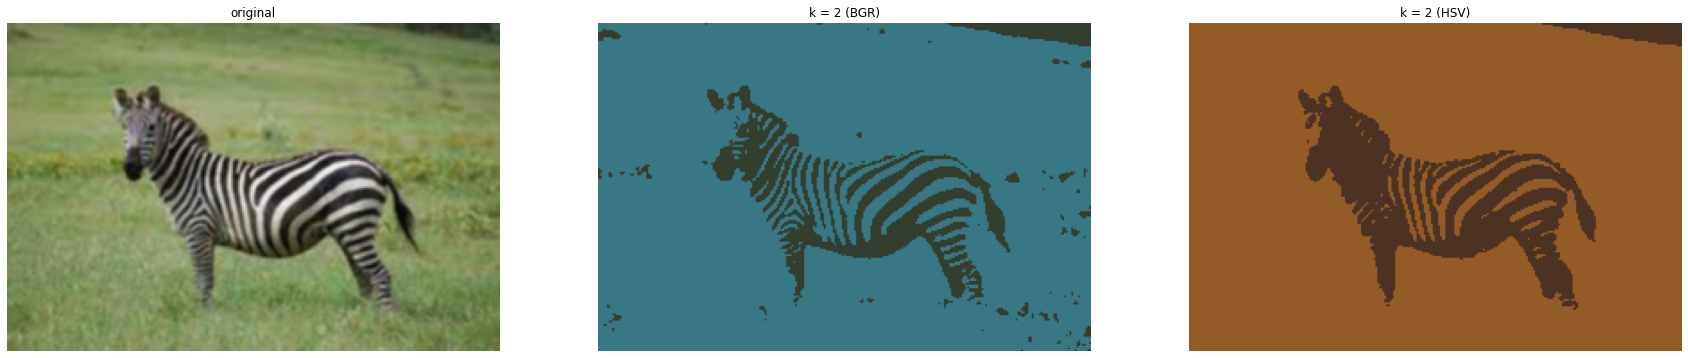

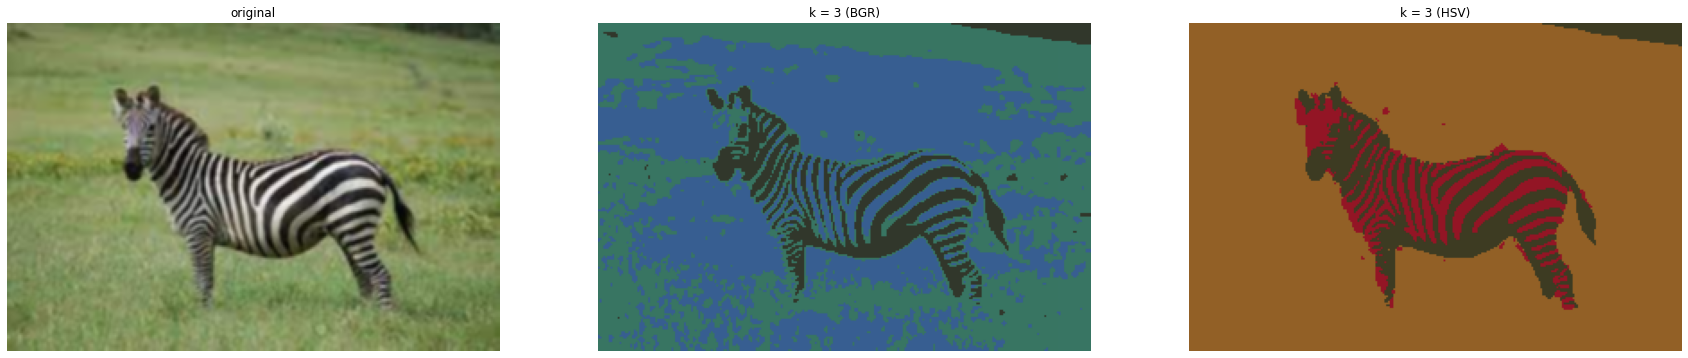

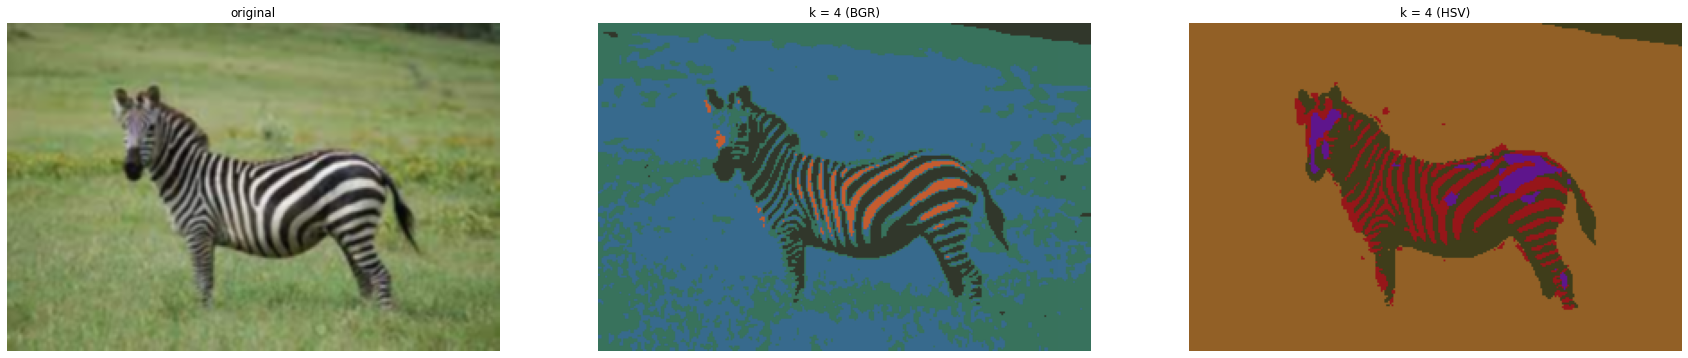

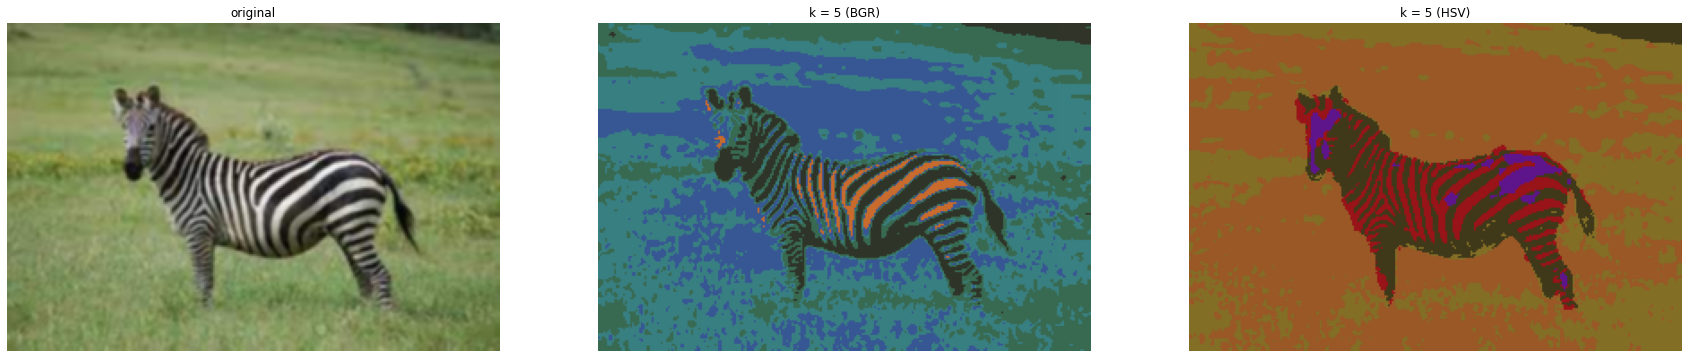

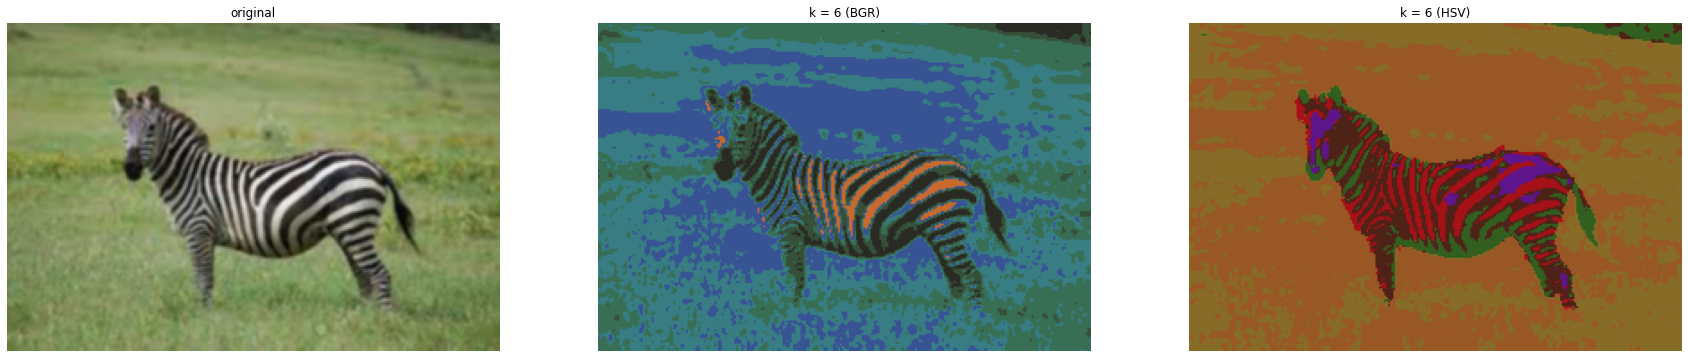

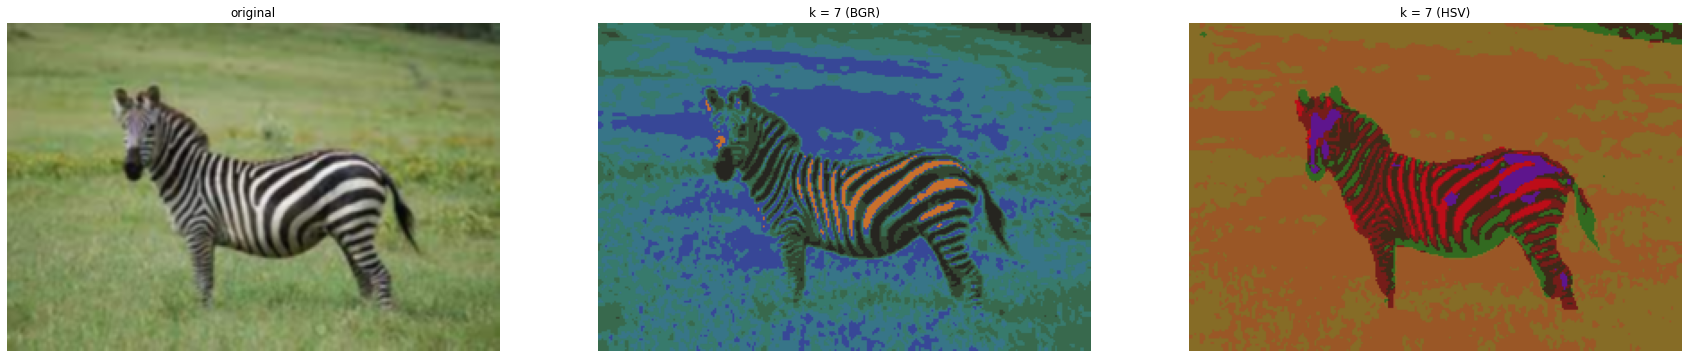

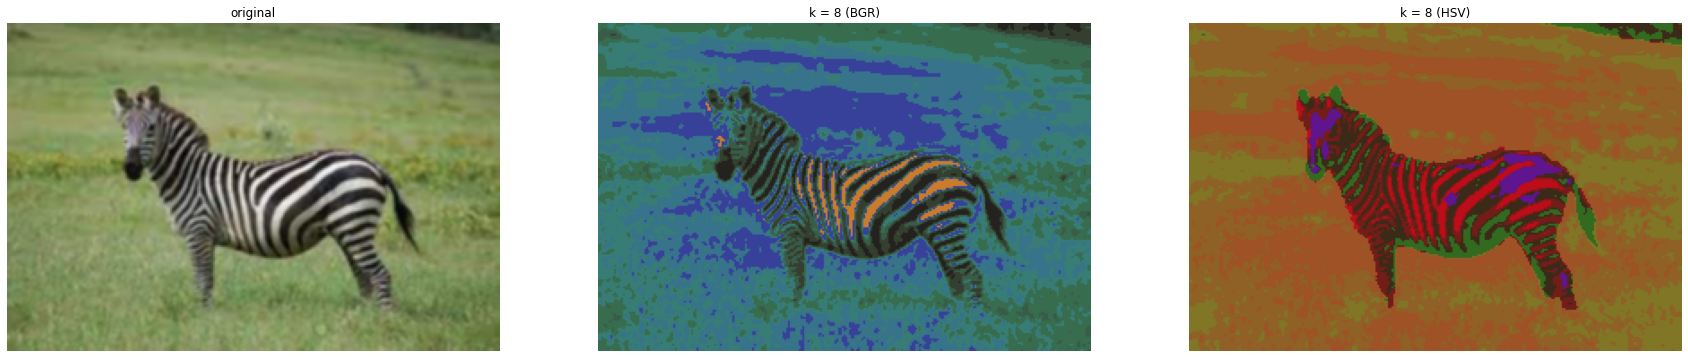

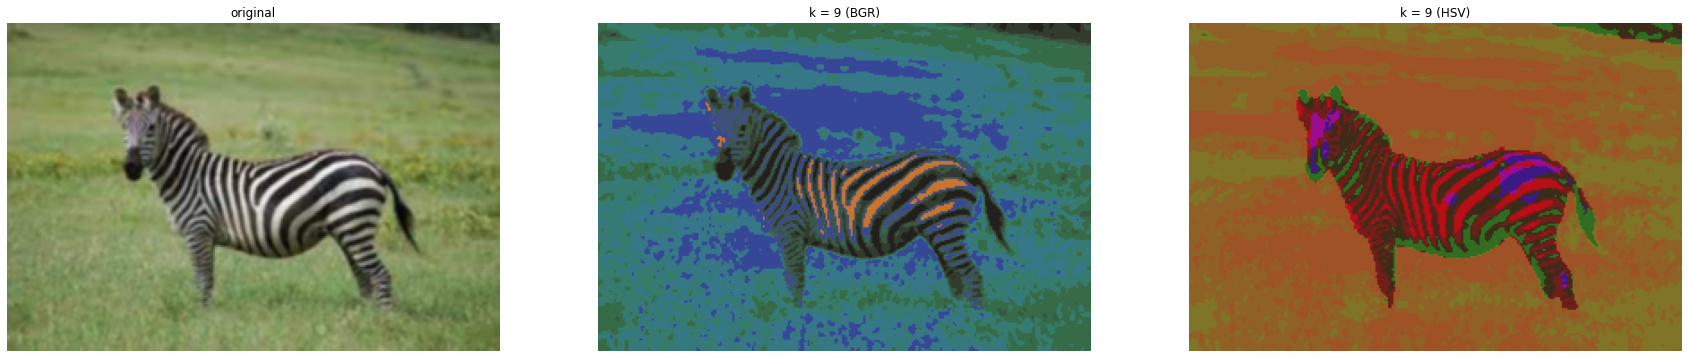

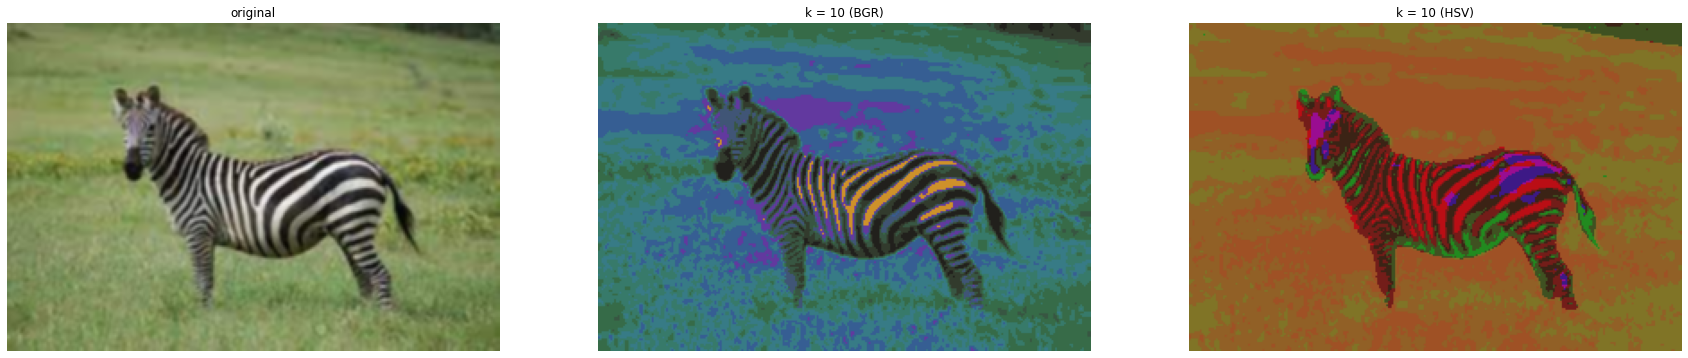

In [14]:
#2
img = cv.imread('zebra.jfif')
img = cv.GaussianBlur(img, (3, 3),0)
img_reshape_bgr = img.reshape((-1, 3))
img_reshape_bgr = np.float32(img_reshape_bgr)

#convert to hsv
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
img_reshape_hsv = img_hsv.reshape((-1, 3))
img_reshape_hsv = np.float32(img_reshape_hsv)

# Define criteria, attempts and number of clusters
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
attempts = 10

# find out the best k
# for k in range (2, 11)
for K in range (2, 11):
    ret, label, center = cv.kmeans(img_reshape_bgr, K, None, criteria, attempts, cv.KMEANS_PP_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    result_img_bgr = res.reshape(img.shape)
    
    ret, label, center = cv.kmeans(img_reshape_hsv, K, None, criteria, attempts, cv.KMEANS_PP_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    result_img_hsv = res.reshape(img_hsv.shape)
    
    plt.figure(figsize = (30, 30))
    plt.subplot(1, 3, 1)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('original'), plt.axis("off")
    plt.subplot(1, 3, 2)
    plt.imshow(cv.cvtColor(result_img_bgr, cv.COLOR_HSV2RGB))
    plt.title(f'k = {K} (BGR)'), plt.axis("off")
    plt.subplot(1, 3, 3)
    plt.imshow(cv.cvtColor(result_img_hsv, cv.COLOR_BGR2RGB))
    plt.title(f'k = {K} (HSV)'), plt.axis("off")
    plt.show()


overall, hsv has a better segmented result 